# Learning ASL with LeNet-5
When people say that deep learning is nothing new, and that the concepts of were described in the 1980s and 1990s, <a href="http://yann.lecun.com/exdb/lenet/">LeNet-5</a> is one of the foundational networks they are talking about. This notebook uses the high-level keras API from Tensorflow to recreate LeNet-5 and classify the letters of the alphabet in American Sign Language, excepting 'j' and 'z' (which rely on dynamic gestures). 


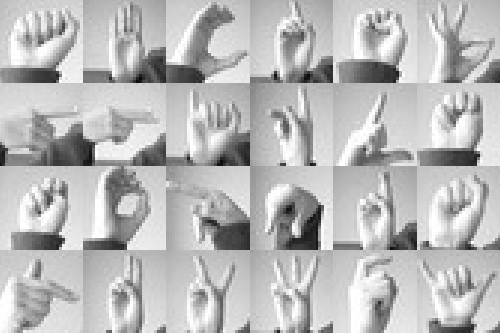

In [1]:
from IPython.display import Image
Image("../input/amer_sign3.png")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import tensorflow as tf
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, SpatialDropout2D, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

In [3]:
# set up training data and labels
dim_x = 28
dim_y = 28
batch_size=32

# read in data/labels
x_train = pd.read_csv('../input/sign_mnist_train.csv')
x_train.head()
x_train.shape
y_train = np.array(x_train['label'])
x_train.drop('label', axis = 1, inplace = True)
x_train = np.array(x_train.values)

print("data shapes", x_train.shape, y_train.shape, "classes: ",len(np.unique(y_train)))

classes = len(np.unique(y_train))
x_train = x_train.reshape((-1, dim_x,dim_y,1))
# convert labels to one-hot
print(np.unique(y_train))
y = np.zeros((np.shape(y_train)[0],len(np.unique(y_train))))

# skip over 'j'
y_train[y_train>8] = y_train[y_train>8] - 1

# convert index labels to one-hot
for ii in range(len(y_train)):
    #print(y_train[ii])
    y[ii,y_train[ii]] = 1
y_train = y

data shapes (27455, 784) (27455,) classes:  24
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [4]:
# split into training/validation
no_validation = int(0.1 * (x_train.shape[0]))

x_val = x_train[0:no_validation,...]
y_val = y_train[0:no_validation,...]

x_train = x_train[no_validation:,...]
y_train = y_train[no_validation:,...]

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

# define image generators with mild augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,\
                                   rotation_range=10,\
                                   width_shift_range=0.05,\
                                   height_shift_range=0.05,\
                                   shear_range=0.1,\
                                   zoom_range=0.075)

train_generator = train_datagen.flow(x=x_train,\
                                     y=y_train,\
                                     batch_size=batch_size,\
                                     shuffle=True)

test_datagen = ImageDataGenerator(rescale=1./255)

val_generator = test_datagen.flow(x=x_val,\
                                    y=y_val,\
                                    batch_size=batch_size,\
                                    shuffle=True)


(24710, 28, 28, 1) (24710, 24) (2745, 28, 28, 1) (2745, 24)


In [5]:
# define model Le-Net5
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5,5), strides=1,input_shape=(dim_x,dim_y,1), activation=tf.nn.tanh))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=1, activation=tf.nn.tanh))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(120,activation=tf.nn.tanh))
model.add(Dense(84,activation=tf.nn.tanh))
model.add(Dense(classes, activation=tf.nn.softmax))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dens

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [7]:
steps_per_epoch = int(len(y_train)/batch_size)
max_epochs = 64
history = model.fit_generator(generator=train_generator,\
                                steps_per_epoch=steps_per_epoch,\
                                validation_data=val_generator,\
                                validation_steps=50,\
                                epochs=max_epochs,\
                                verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/256
86/86 [==============================] - 0s 5ms/step - loss: 2.0903 - acc: 0.4073
 - 10s - loss: 2.7426 - acc: 0.2067 - val_loss: 2.0903 - val_acc: 0.4073
Epoch 2/256
86/86 [==============================] - 0s 6ms/step - loss: 1.5102 - acc: 0.5854
 - 9s - loss: 1.9311 - acc: 0.4484 - val_loss: 1.5102 - val_acc: 0.5854
Epoch 3/256
86/86 [==============================] - 0s 5ms/step - loss: 1.1774 - acc: 0.6874
 - 10s - loss: 1.5401 - acc: 0.5582 - val_loss: 1.1774 - val_acc: 0.6874
Epoch 4/256
86/86 [==============================] - 0s 5ms/step - loss: 0.9621 - acc: 0.7413
 - 9s - loss: 1.2851 - acc: 0.6251 - val_loss: 0.9621 - val_acc: 0.7413
Epoch 5/256
86/86 [==============================] - 0s 6ms/step - loss: 0.8166 - acc: 0.7818
 - 9s - loss: 1.1071 - acc: 0.6737 - val_loss: 0.8166 - val_acc: 0.7818
Epoch 6/256
86/86 [==============================] - 0s 4ms/step - loss: 0.6800 - acc: 0.8295
 - 9s - loss: 0.9536 - acc

 - 10s - loss: 0.0269 - acc: 0.9959 - val_loss: 0.0048 - val_acc: 1.0000
Epoch 49/256
86/86 [==============================] - 0s 5ms/step - loss: 0.0043 - acc: 1.0000
 - 9s - loss: 0.0262 - acc: 0.9953 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 50/256


KeyboardInterrupt: 

In [8]:
plt.figure(figsize=(15,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy",fontsize=28)
plt.xlabel('epoch',fontsize=18)
plt.ylabel('accuracy',fontsize=18)
plt.legend(['Train','Val'],fontsize=18)
plt.show()

NameError: name 'history' is not defined

<Figure size 1080x576 with 0 Axes>

In [9]:
x_test = pd.read_csv('../input/sign_mnist_test.csv')
y_test = x_test['label']
x_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [10]:

x_test.drop('label', axis = 1, inplace = True)
x_test = np.array(x_test.values)
x_test = x_test / 255.

print("data shape", x_test.shape)

x_test = x_test.reshape((-1, dim_x,dim_y,1))

data shape (7172, 784)


In [11]:

# convert labels to one-hot
print(np.unique(y_test))

y_temp = np.zeros((np.shape(y_test)[0],len(np.unique(y_test))))

y_test[y_test>8] = y_test[y_test>8] - 1

for ii in range(len(y_test)):
    #print(y_train[ii])
    y_temp[ii,y_test[ii]] = 1
y_test = y_temp

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [12]:
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.9776910206358059

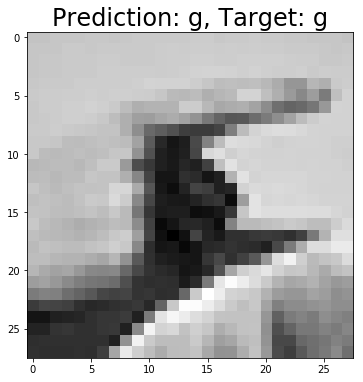

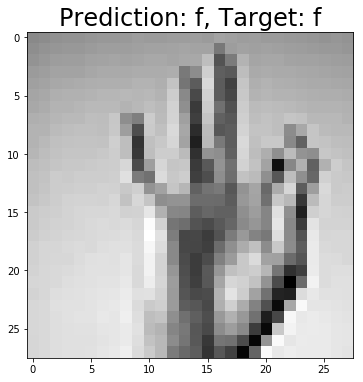

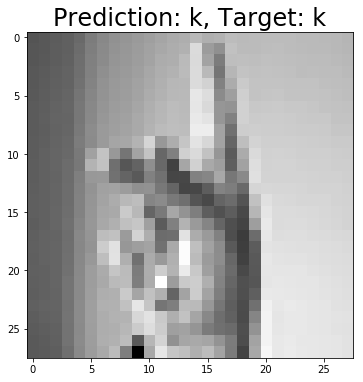

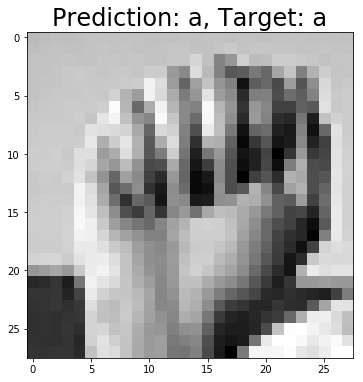

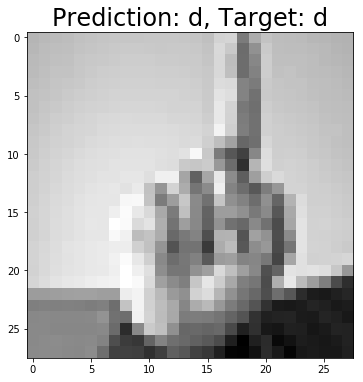

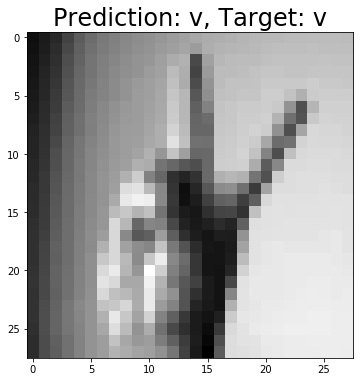

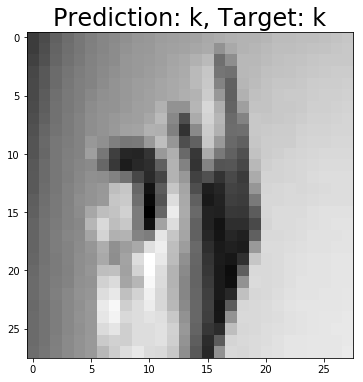

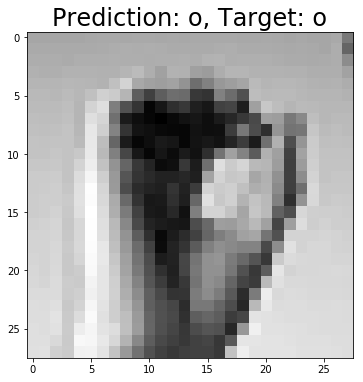

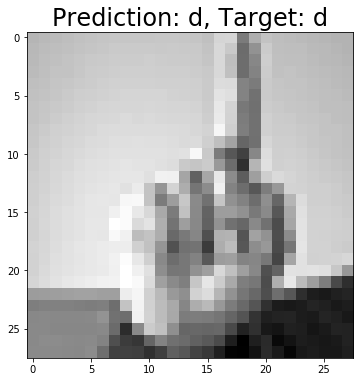

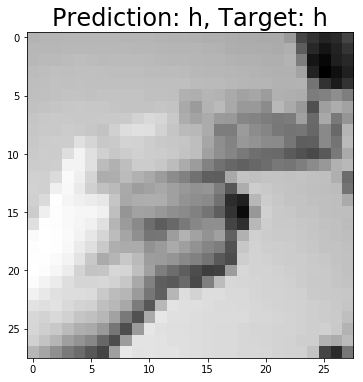

In [14]:
# see how we did

def imshow_w_labels(img, target, pred):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap="gray")
    plt.title("Prediction: %s, Target: %s"%(target,pred), fontsize=24)
    plt.show()

letters = {}
counter = 0
for letter in ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']:
    letters[counter] = letter
    counter += 1
    
for kk in range(50,60):
    imshow_w_labels(x_test[kk,:,:,0],letters[y_test[kk].argmax()], letters[y_pred[kk].argmax()])